In [1]:
!pip install spectral

import keras
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
 
from operator import truediv
 
from plotly.offline import init_notebook_mode
 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import spectral
 
init_notebook_mode(connected=True)
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 215kB 19.1MB/s 


Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
X=sio.loadmat('/content/drive/MyDrive/Dataset/Indian_pines_corrected.mat')['indian_pines_corrected']
y=sio.loadmat('/content/drive/MyDrive/Dataset/Indian_pines_gt.mat')['indian_pines_gt']


noc=25
X=np.reshape(X,(145*145,200))
from sklearn.decomposition import PCA
pca = PCA(n_components = noc)
X = pca.fit_transform(X)
X.shape
y=np.reshape(y,(145*145))


X.shape


XX=np.zeros((10249,noc))
YY=np.zeros(10249)
c=0
for i in range(21025):
  if(y[int(i)]>0):
    XX[int(c)]=X[i]
    YY[int(c)]=y[i]
    c=c+1

X=XX
y=YY

#traindata.shape,testdata.shape ,trainclass.shape,testclass.shape
X.shape,y.shape


((10249, 25), (10249,))

In [9]:
ts=1
ft=25
traindata,testdata,trainclass,testclass=train_test_split(X,y,test_size=0.2,random_state=345,stratify=y)

traindata,validationdata,trainclass,validationclass=train_test_split(traindata,trainclass,test_size=0.4,random_state=50,stratify=trainclass)

traindata.shape,validationdata.shape

((4919, 25), (3280, 25))

In [ ]:
traindata.shape

(4919, 25)

In [10]:
from sklearn.preprocessing import LabelBinarizer
bin = LabelBinarizer()

trainclass=bin.fit_transform(trainclass)
testclass=bin.fit_transform(testclass)
validationclass=bin.fit_transform(validationclass)

traindata=np.reshape(traindata,(4919,ts,ft))
validationdata=np.reshape(validationdata,(3280,ts,ft))
testdata=np.reshape(testdata,(2050,ts,ft))


17/17 [==============================] - 0s 3ms/step - loss: 0.7821 - accuracy: 0.7073
[[2.5508928e-04 2.0427200e-04 2.3231726e-06 ... 1.7474743e-03
  7.8617150e-01 9.2349900e-08]
 [4.6146344e-16 1.4899916e-15 1.0338163e-16 ... 1.0597165e-08
  4.1073066e-04 1.7566901e-16]
 [1.3851069e-04 1.6259654e-01 1.8694305e-01 ... 4.6515907e-04
  1.0949561e-03 2.3591605e-03]
 ...
 [1.3158272e-04 9.6968472e-02 2.9425433e-01 ... 5.7543290e-04
  1.2299049e-03 1.9639398e-03]
 [1.2350253e-10 1.6128136e-02 5.4503731e-02 ... 2.7507840e-10
  1.8334531e-09 6.4190893e-08]
 [1.0597438e-07 2.6915470e-07 3.9130006e-07 ... 1.2116289e-04
  7.9484329e-02 6.9916787e-08]]
test loss, test acc: [0.7821089625358582, 0.707317054271698]


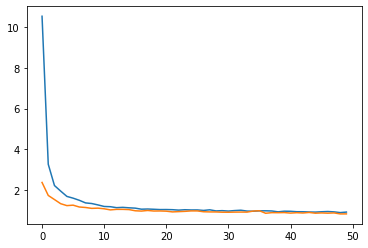

In [8]:
#Ar=[300,300,400,500,600]
#Br=[440,330,440,350,260]
#Cr=[320,220,250,300,350]
#c=1
#for ii in range(5):
 # for jj in range(5):
  #  for kk in range(5):
   #   print(Ar[ii]," ",Br[jj]," ",Cr[kk])
      #Initializing library for  LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
#Creating  LSTM model
model = Sequential()
model.add(LSTM(300, activation='relu',return_sequences=True,input_shape=(ts, ft)))
model.add(Dropout(0.3))
model.add(LSTM(440, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
st=str(c)+".png"

history=model.fit(traindata,trainclass,epochs=50, validation_data=(validationdata,validationclass),verbose=0)
results= model.evaluate(testdata,testclass,batch_size=128)
y_pred=model.predict(testdata)
print(y_pred)
print("test loss, test acc:", results)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.savefig(st)
plt.pause(0.05)
c=c+1



In [ ]:
y_pred=model.predict(testdata)
y_pred = np.argmax(y_pred, axis=1) 
testclass = np.argmax(testclass, axis=1) 

print(confusion_matrix(testclass,y_pred))




[[  4   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0]
 [  0 171   1   0   0   0   0   0   0  30  84   0   0   0   0   0]
 [  0  32   6   0   0   0   0   0   0  78  50   0   0   0   0   0]
 [  0  37   1   1   0   3   0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   0  88   5   0   0   0   0   1   0   0   2   1   0]
 [  0   2   0   0   0 139   0   0   0   0   2   1   0   1   1   0]
 [  0   0   0   0   0   0   4   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  96   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0   2   2   0   1   0   0   0   1 149  39   0   0   0   0   0]
 [  0  29   0   2   0   1   1   1   0  37 419   0   0   0   0   1]
 [  0  14   0   0   0   0   0   0   0  24  78   2   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   1   0  40   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0 250   2   0]
 [  0   0   0   0   2  14   0   0   1   1   1   0   7  31  20 

In [ ]:
arr=confusion_matrix(testclass,y_pred)
for i in range(16):
   s=0
   for j in range(16):
     s+=arr[i][j]
   print(arr[i][i]/s)

0.3333333333333333
0.6468531468531469
0.4397590361445783
0.1276595744680851
0.9072164948453608
0.9863013698630136
1.0
1.0
0.0
0.6494845360824743
0.7861507128309573
0.7226890756302521
0.975609756097561
0.9841897233201581
0.45454545454545453
0.7894736842105263


In [ ]:
TrC= np.argmax(trainclass, axis=1) 


In [ ]:
cnt=np.zeros(17)
for i in TrC:cnt[i]=cnt[i]+1

cnt


array([  22.,  685.,  398.,  114.,  232.,  350.,   14.,  229.,   10.,
        467., 1178.,  284.,   99.,  607.,  185.,   45.,    0.])

In [ ]:
cnt1=np.zeros(17)
for i in testclass:cnt1[i]=cnt1[i]+1

cnt1

array([  9., 286., 166.,  47.,  97., 146.,   5.,  96.,   4., 194., 491.,
       119.,  41., 253.,  77.,  19.,   0.])

In [ ]:
TC

array([ 1, 10,  5, ...,  5, 10, 13])

In [ ]:
ys=0
for i in TC:
  if(i==16):ys=1

ys

0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 300)            391200    
_________________________________________________________________
dropout (Dropout)            (None, 1, 300)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 440)               1304160   
_________________________________________________________________
dropout_1 (Dropout)          (None, 440)               0         
_________________________________________________________________
dense (Dense)                (None, 320)               141120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5